### Imports

In [1]:
from GenerativeAugmentations import Augmenter
from PIL import Image

/home/jovyan/.mlspace/envs/ddorin/lib/python3.12/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


### Model initialization

In [2]:
model = Augmenter()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/home/jovyan/.mlspace/envs/ddorin/lib/python3.12/site-packages/transformers/models/llava/configuration_llava.py:100: FutureWarning: The `vocab_size` argument is deprecated and will be removed in v4.42, since it can be inferred from the `text_config`. Passing this argument has no effect
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

An error occurred while trying to fetch checkpoints/ppt-v2-1/realisticVisionV60B1_v51VAE/vae: Error no file named diffusion_pytorch_model.safetensors found in directory checkpoints/ppt-v2-1/realisticVisionV60B1_v51VAE/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/home/jovyan/.mlspace/envs/ddorin/lib/python3.12/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
An error occurred while trying to fetch checkpoints/ppt-v2-1/realisticVisionV60B1_v51VAE/unet: Error no file named diffusion_pytorch_model.safetensors found in directory checkpoints/ppt-v2-1/realisticVisionV60B1_v51VAE/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
You have disabled the safety checker for <class 'GenerativeAugmentations.models.PowerPain

07/25 23:28:38 - mmengine - INFO - Successfully add external embeddings: P_ctxt, P_shape, P_obj.
07/25 23:28:38 - mmengine - INFO - Successfully add trainable external embeddings: P_ctxt, P_shape, P_obj


### Examples of working

In [3]:
image = Image.open("examples/image.jpg")
cat_mask = Image.open("examples/cat_mask.jpg")
person_mask = Image.open("examples/person_mask.jpg")

  0%|          | 0/50 [00:00<?, ?it/s]

New object: dog, prompt: This dog has a medium-sized golden fur, with playful brown eyes and floppy ears, eagerly standing by its owner.



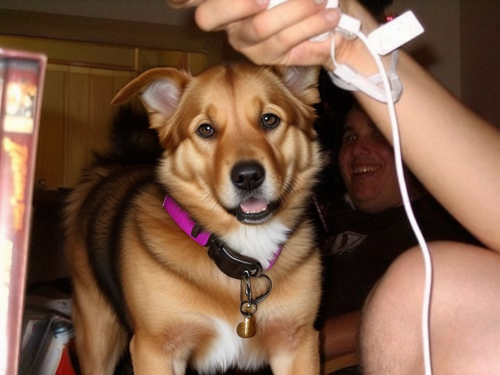

In [5]:
new_image, (prompt, new_object) = model(image=image,
                                    mask=cat_mask,
                                    current_object="cat",
                                    new_objects_list=None,
                                    ddim_steps=50,
                                    guidance_scale=5,
                                    seed=42,
                                    return_prompt=True)

print(f'New object: {new_object}, prompt: {prompt}\n')
new_image.show()

  0%|          | 0/50 [00:00<?, ?it/s]

New object: pottedplant, prompt: Viewing the potted plant closely, it has vibrant green leaves with curving patterns and sturdy branches supporting its growth.



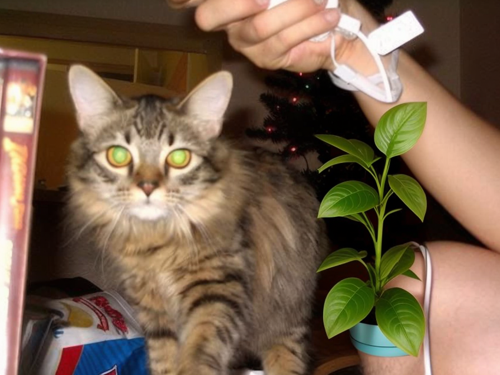

In [14]:
new_image, (prompt, new_object) = model(image=image,
                                    mask=person_mask,
                                    current_object="person",
                                    new_objects_list=["pottedplant"],
                                    ddim_steps=50,
                                    guidance_scale=5,
                                    seed=1,
                                    return_prompt=True)

print(f'New object: {new_object}, prompt: {prompt}\n')
new_image.show()